In [1]:
######### Package Import ######################
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
from PIL import Image
import random

In [2]:
############## InstagramPost File Loading ##################
data_path = "BlackLivesMatter_InstagramPosts.json"

with open (data_path, 'r', encoding = "UTF-8") as json_file:
    data_list = json.load(json_file)

print("Number of Posts Read:", len(data_list))


Number of Posts Read: 56592


In [3]:
############# Instagram Comments File Loading ###############3
data_file = "BlackLivesMatter_InstagramComments.json"
with open(data_file, 'r', encoding = "UTF-8") as json_file:
    data_list2 = json.load(json_file)

combined = data_list + data_list2
print("Number of Comments Read:", len(data_list2))
print("Total Number of Documents:", len(combined))

news_content = " ".join(combined).lower()

Number of Comments Read: 240763
Total Number of Documents: 297355


In [4]:
############### Tokenize Words ###################
# word_tokenize() function takes a text blob and breaks it into 'words'.
tokenizer = RegexpTokenizer(r'\w+')
#news_words = word_tokenize(news_content)
news_words = tokenizer.tokenize(news_content)
# print (news_words)
# How many words are in this news article?
print ("Total Number of Words",len(news_words))

Total Number of Words 5537932


In [5]:
################# Load Stopwords #################
# Let's load up English corpus from NLTK package.
stop_words = stopwords.words('english')
# # See what words are inside.
stop_words = stop_words + ["blacklivesmatter", "link", "bio", "blm", "repost", "live", "matter", "black", "lives", "need", "follow", "like", "instagram", "time", "see", "want", "make", "photo", "instagood", "explorepage", "post", "likeforlike", "music", "meme", "tiktok", "https", "explore", "photooftheday", "comment", "likeforlikes", "followforfollowback", "fashion", "one", "de", "memes", "video", "let", "still", "youtube", "artist", "art", "lol", "bro", "baby", "happy birthday", "lmao", "ok", "fucking"]
# print (stop_words)

In [6]:
########### Filter out Stopwords ############
news_words_filtered = []

for w in news_words:
    if w not in stop_words:
        news_words_filtered.append(w)

# After removing stop words, how many words remain?
print ("Total Number of Words after Filter:",len(news_words_filtered))
# print(news_words_filtered)

Total Number of Words after Filter: 3265985


In [7]:
############# Word Stemming ############3#
porter_stemmer = PorterStemmer()

# Let's stem all the words in our news article.
news_words_filtered_stemmed = []
for w in news_words_filtered:
    news_words_filtered_stemmed.append(porter_stemmer.stem(w))

print("Words Stemmed")
# print (news_words_filtered_stemmed[:500])

Words Stemmed


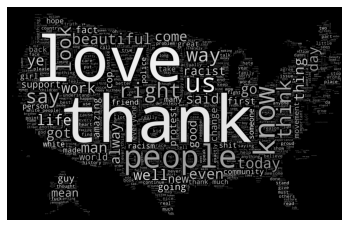

WordCloud Original


In [8]:
############# Form Word Cloud ###############
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

# Word Cloud takes a string. Convert our list of words into a string.
words_joined_stemmed = " ".join([w for w in news_words_filtered_stemmed])
words_joined = " ".join([w for w in news_words_filtered])
# print(words_joined[:1000])

# Create a word cloud
mask = np.array(Image.open("../usaMap2.jpg"))
# Create a word cloud
my_wordcloud = WordCloud(background_color='black',
                         width=3000,
                         height=2000,
                         mask = mask,
                         max_words = 2000,
                         color_func=grey_color_func).generate(words_joined)

# worldcloud2 = WordCloud(background_color='white',
#                          width=3000,
#                          height=2000).generate(words_joined_stemmed)

plt.imshow(my_wordcloud)
plt.axis('off')
plt.savefig('InstagramWFCloud.png', dpi=300)
plt.show()
print("WordCloud Original")

# plt.imshow(worldcloud2)
# plt.axis('off')
# plt.savefig('InstagramStemmed.png',dpi=300)
# plt.show()
# print("WorldCloud Stemmed")



In [9]:
#instantiate CountVectorizer()
# print(len(data_list)*0.001)
Vector_stop_words = stopwords.words('english')
Vector_stop_words = Vector_stop_words + ['blacklivesmatter', 'blacklivesmatters', 'https', 'http', "blm", "co", "amp","followme","24",]
cv=CountVectorizer(max_df = 0.85, stop_words =Vector_stop_words, min_df = 0.001, ngram_range= (1,3))

# this steps generates word counts for the words in your docs
word_count_vector=cv.fit_transform(combined)

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

# print(word_count_vector)
#(294165 , 149940) refers to 294165 documents, 149940 refers to vocabulary size
# print idf values

df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"])

# sort ascending
df_sorted = df_idf.sort_values(by=['idf_weights'], ascending = False)

# print(word_count_vector.stop_words_)
print("Printing top 20 words out of", len(df_sorted))
print(df_sorted[:20])

Printing top 20 words out of 1594
                           idf_weights
honored                       7.902242
reform                        7.902242
followｍe                      7.902242
bethechange                   7.898903
female                        7.895575
de la                         7.895575
shoes                         7.895575
flowers                       7.895575
donations                     7.895575
defend                        7.895575
afraid                        7.895575
blackownedbusinesses          7.895575
football                      7.888953
blacklives                    7.888953
ladies                        7.888953
georgefloyd breonnataylor     7.888953
criminal                      7.888953
acting                        7.888953
outfit                        7.885658
fortnite                      7.885658


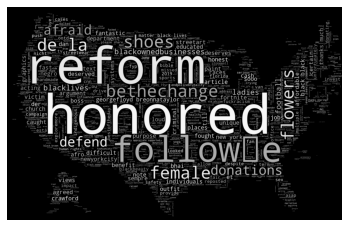

In [10]:
########## Generate IDF word cloud ################333

mask = np.array(Image.open("../usaMap2.jpg"))
# Create a word cloud
wc = WordCloud(background_color='black',
                         width=3000,
                         height=2000,
                         mask = mask,
                         max_words = 2000,
                         color_func=grey_color_func).generate(words_joined)

weights = df_sorted.to_dict()

wc.generate_from_frequencies(weights['idf_weights'])

plt.imshow(wc)
plt.axis('off')
plt.savefig('InstagramIDFCloud.png', dpi=300)
plt.show()